# Version 1.0
# 4/12/21
Machine Learning Group Project


Adapted from file "BasicModelsV1.0.py"

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", size=14) #Font size
plt.rcParams["figure.figsize"] = (10,10) #Fig size

# Checking csv and titles by importing first row of a file

In [5]:
file_dir="../SpotifyData/"
file_name="ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv"

test_csv = pd.read_csv(file_dir+file_name, index_col=0, nrows=1) 
display(test_csv)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name
0,0.31,0.7,9,-5.678,1,0.047,0.011,0.00965,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4,Back In Black


# Compiling Data
Next step is to make a single dataframe holding the data from all source files


In [68]:
file_dir="../SpotifyData/"

file_names= ["JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
            "ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv"]

#file_nrows=[ 200, 205, 227,229, 299, 322, 385, 434]

#Sticking with just the basic parameters for now
#parameter_columns = [1,2,6,7,8,9,10]
# tempo_column=11
# mode 5
parameter_columns = [1,2,5,6,7,8,9,10,11]



## Most convenient to set up dataframe with initial file, then systematically loop through the others
## 1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns)#, nrows=file_nrows[0])

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    ## dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns)
    
    ## Incase we want to use const number of songs per playlist
    #dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns), \
    #                  nrows=200)

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    

    
## Removing duplicates
print("Removing n duplicates = ", data.duplicated().sum()) #prints number of duplicates
data = data.drop_duplicates() 
display(data.head())

## Reseting indexing after dropping duplicates
data.reset_index(drop=True, inplace=True)

#X = data.loc[:,"danceability":"tempo"]
X = data.loc[:,"danceability":"tempo"]
Y = data.loc[:,"playlist_number"]
X_norm = data.iloc[:, [0,1,3,4,5,6,7]]#Just 7 normalized_params

#Numpy array more convenient
X=np.array(X);Y=np.array(Y)
X_norm = np.array(X_norm)
classes=np.array([1,2,3,4,5,6,7,8])

Removing n duplicates =  24


,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_number
0,0.639,0.2690,1,0.0698,0.982,0.120000,0.141,0.539,124.866,1.0
1,0.419,0.0284,1,0.0357,0.987,0.586000,0.105,0.121,71.502,1.0
2,0.573,0.2470,0,0.0627,0.713,0.000056,0.103,0.604,138.234,1.0
3,0.593,0.1030,1,0.0810,0.986,0.600000,0.120,0.443,66.283,1.0
4,0.450,0.0288,1,0.0467,0.994,0.895000,0.118,0.358,130.838,1.0


# LinearClassifier
1) Choose q with Linear Classifier


2) Move to ridge classifier and choose C

In [52]:
from sklearn.metrics import precision_score, accuracy_score

from sklearn.model_selection import KFold    
n_splits=5
kf = KFold(n_splits=n_splits, shuffle=True) #important to shuffle for our ordered data


from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]      
#Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)


#Pipelining output from StandardScaler into input of model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #Rescale data
#pipe = make_pipeline(StandardScaler(), ...model...)

[0.5622125609428386, 0.6226841721371261, 0.6161282582824676, 0.616133056931168, 0.5249635302698761] 
 [0.020042151216799826, 0.0209834768267304, 0.005276937982684963, 0.0351287522864571, 0.025732170702516762]


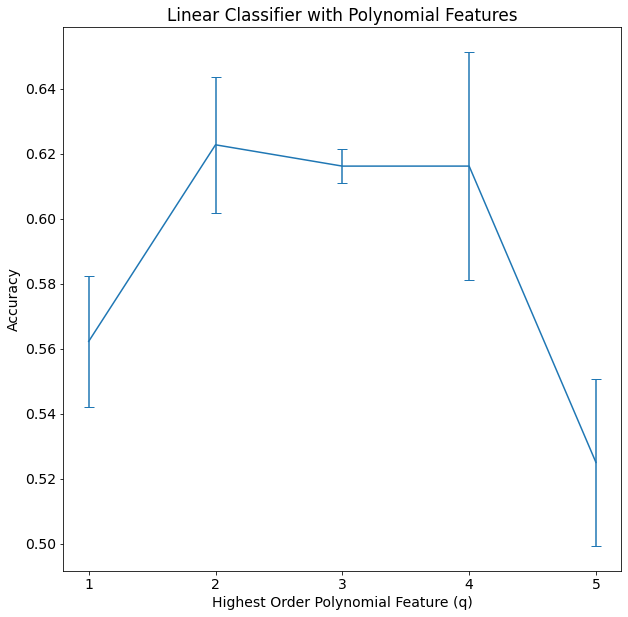

In [53]:
from sklearn.linear_model import RidgeClassifier
#Imitating Linear Classifier we small alpha
C0 = 1e6

pipe = make_pipeline(StandardScaler(), \
        RidgeClassifier(alpha = 1/C0 ))

################################

q_poly = [1,2,3,4,5]
accuracy=[]
accuracy_err=[]
for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    
    tmp=[]
    for train, test in kf.split(Xpoly):
        #Rescale then fit
        pipe.fit(Xpoly[train],Y[train])
        
        #Accuracy
        tmp.append( pipe.score(Xpoly[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


print(accuracy, "\n", accuracy_err)

plt.errorbar(q_poly, accuracy, yerr=accuracy_err, capsize=5)
plt.xticks(q_poly)
plt.xlabel("Highest Order Polynomial Feature (q)")
plt.ylabel("Accuracy")
plt.title("Linear Classifier with Polynomial Features")

plt.savefig("../Images/LinearClassifier_NormalParams.png")    
plt.show()

In [54]:
#Best accuracy from q_best, save these results for comparison with Ridge Classifier
q_best=3
lin_acc = accuracy[q_best-1]
lin_acc_err=accuracy_err[q_best-1]

print("Best accuracy from Basic Linear Classifier = [%lf +- %lf]" %(lin_acc, lin_acc_err))

Best accuracy from Basic Linear Classifier = [0.616128 +- 0.005277]


[0.6034252754424354, 0.6126252447310838, 0.6196235939959307, 0.6288226035548389, 0.6218088986141503, 0.6192041920995047, 0.6218319321279129] 
 [0.014195256788777815, 0.018259420741345234, 0.0201147715092608, 0.020309267010567497, 0.03743868591326998, 0.024900997621929478, 0.01804684806479489]


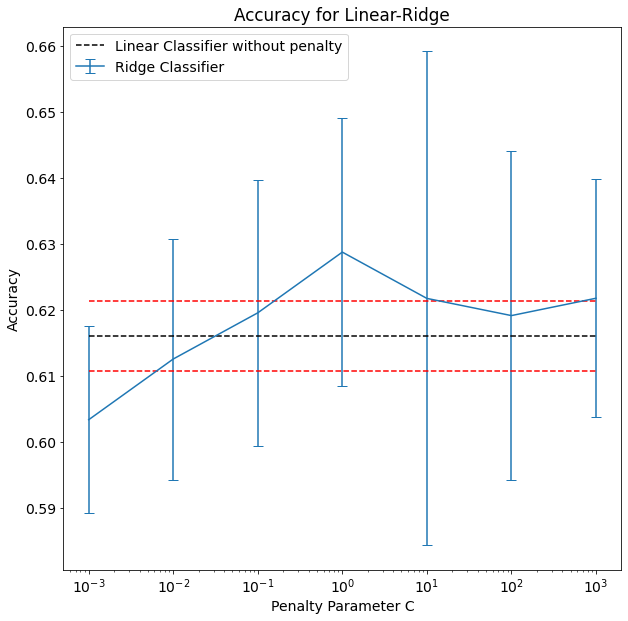

In [55]:
from sklearn.linear_model import RidgeClassifier
#Tuning hyperparameter C now, with q_best

################################

Xpoly = PolynomialFeatures(q_best, include_bias=False).fit_transform(X)

#Range of penalty parameters, scaling up by *10
Cs = [0.001,0.01,0.1, 1, 10,100,1000]

accuracy=[]
accuracy_err=[]
for c in Cs:
    pipe = make_pipeline(StandardScaler(), \
            RidgeClassifier(alpha = 1/c ))
    
    tmp=[]
    for train, test in kf.split(Xpoly):
        pipe.fit(Xpoly[train],Y[train])
        
        #Accuracy
        tmp.append( pipe.score(Xpoly[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )

print(accuracy, "\n", accuracy_err)

plt.errorbar(Cs, accuracy, yerr=accuracy_err, capsize=5, label="Ridge Classifier")
plt.hlines( lin_acc + lin_acc_err, Cs[0], Cs[-1], linestyles="dashed", color="red")
plt.hlines( lin_acc, Cs[0], Cs[-1], linestyles="dashed", color="black", label="Linear Classifier without penalty")
plt.hlines( lin_acc - lin_acc_err, Cs[0], Cs[-1], linestyles="dashed", color="red")

plt.xticks(Cs)
plt.xscale("log")

plt.xlabel("Penalty Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy for Linear-Ridge")
    
#plt.savefig("../Images/RidgeClassifier_NormalParams.png")
plt.show()